# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

**1 - What is our independent variable? What is our dependent variable?**

Independent variable: type of test (congruent or incongruent)

Dependent variable: time

**2 - What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

| Null hypothesis ($H_0$)| Alternative hypothesis ($H_A$)| Number of tails  |
|:----------------------:|:-----------------------------:|:----------------:|
| $\mu_C - \mu_I = 0$    | $\mu_C - \mu_I \neq 0$        | 2                |
where C is for congruent and I is for incongruent.

$H_0: \mu_C = \mu_I$, **there is no** significant difference of the population mean time to take the test for the congruent and incongruent condition.

$H_A: \mu_C \neq \mu_I$, **there is** significant difference of the population mean time to take the test for the congruent and incongruent condition.  

As (i) we don't know the population's standard deviation, and there are only 24 samples, (ii) we are looking for statistical significance of the results, and (iii) we assume that the distributions are Gaussian, I will be using a Dependent‐Samples t-test (paired t-test).

The Dependent-Samples t-test is the most appropriate one because the participants of the different trials are paired, i.e., the same participant takes the test for the congruent and incongruent condition.

**Now it’s your chance to try out the Stroop task for yourself. Go to this [link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&usg=AFQjCNFRXmkTGaTjMtk1Xh0SPh-RiaZerA), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&usg=AFQjCNGAjbK9VYD5GsQ8c_iRT9zH9QdOVg) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.**

**3 - Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import math

sns.set_style("whitegrid")

In [13]:
df = pd.read_csv('stroopdata.csv')

In [14]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


One measure of central tendency: mean

One measure of variability: std

**4 - Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b18fd90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b16f050>]], dtype=object)

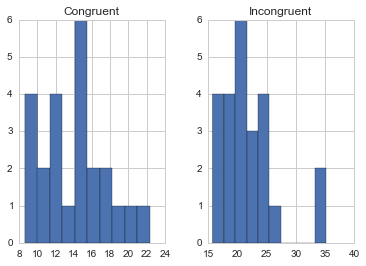

In [15]:
df.hist(layout=(1,2))   

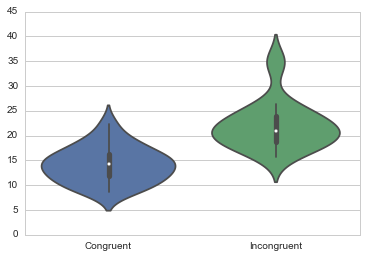

In [16]:
sns.violinplot(df)

The participants needed less time to name the colors in the congruents words condition; Naming the color of the word in the incongruent words condition seems to take longer.

**5 - Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [17]:
#set alpha
alpha = 0.05

#calculate degrees of freedom
dfreedom = len(df.index) - 1
print "DF = {}".format(dfreedom)

#get t-crical from t-table 
t_critical = 2.069
print "Accept H0 if {} <= t-statistic <= {}".format(-t_critical, t_critical)

#calculate t-statistic
df['sub'] = df['Congruent'] - df['Incongruent']
df['sqdiff'] = (df['sub'] - df['sub'].mean())**2

ct = df['sub'].count()
sd_I_C = math.sqrt(df['sqdiff'].sum() / (ct - 1))

t_statistic = df['sub'].mean() / (sd_I_C / math.sqrt(ct))

print "t-statistic = {}".format(t_statistic)

#decision
if(-t_critical > t_statistic or t_critical < t_statistic):
    print "Reject H0"
else:
    print "Accept H0"

DF = 23
Accept H0 if -2.069 <= t-statistic <= 2.069
t-statistic = -8.02070694411
Reject H0


### Conclusion & Methodology
We reject the null hypothesis with 95% confidence. Hence, this means that the incongruent condition significantly impacts the time to perform the test, when compared with the congruent condition.

The methodology for the dependent samples t-test (following from the python code above) is:
1. I defined the null and alternative hypothesis 
2. I set alpha to 0.05 (I've also done it for 0.01)
3. I calculated the degrees of freedom (23)
4. I obtained the t-critical from t-table (2.0129)
5. I calculated the t-statistic for the differences of the two samples (-4.108)
6. I compared t-statistic with t-critical (-2.069 < -4.108 < 2.069?)
7. I stated the conclusions (reject null hypothesis)

**6 - Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

A person's psychological capacities is responsible for the effects observed. 

A similar task would be to do this test for men only (and/or women only). An alternative would be to type the first letter of the color shown. 

In [18]:
#stats.ttest_rel(df['Congruent'],df['Incongruent'])